<a href="https://www.kaggle.com/code/ahmedmagdy2809/zomato-in-depth-eda?scriptVersionId=210452325" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

After putting in considerable effort to explore and clean the Zomato dataset, I’ve crafted a detailed EDA with insightful visualizations that reveal interesting trends and patterns across various restaurant categories in India. hope it is good and helps.

# EDA Project Roadmap
## 1. Introduction of the dataset and aim of the EDA
    1. Dataset Introduction
    2. Aim of the EDA
## 2. Libraries setup and reading the data
    1. pandas for data processing
    2. numpy for mathematical operations
    3. matplotlib.plotly, seaborn & plotly.express for data vizualisations (instead of tableau)
## 3. get an overview and deep review of the data.
    1. using info & describe functions
    2. using head & tail functions to view the data
## 4. Handling missing values and Data Structuring
    1. Managing columns (Create, drop and rename)
    2. changing the datatypes of the columns
    3. using isull.sum # Count missing values per column
    4. using heatmap sns.heatmap(data.isnull(), cbar=False)  # Visualize missing data
    5. fill or drop missing values according to the dataset and logic.
    6. check for outliets using sns.boxplot(x=data['column_name']) for numerical columns.
## 5. Analysis and vizualisation of the data
    1. using seaborn and matplotlib to provide detailed vizulaisations
## 6. provide insights from vizualisations
    1. prepare a summery report including the insights.

# 1. **Introduction of the dataset and aim of the EDA**

<img src='https://logos-world.net/wp-content/uploads/2020/11/Zomato-Logo.png'></img>

## 1. **Dataset Introduction**

The dataset being analyzed is from the <a href ='https://www.zomato.com/'>**Zomato Website**</a>, which contains information about restaurants, their locations, ratings, cuisines, and more. It includes **20,000+ records and 17 features**. Key variables in the dataset include **'Restaurant Name'**, **'Location'**, **'Cuisine'**, **'Average Cost for Two'**, and **'Rating'**.

### Key Features:
- **Restaurant Name**: Name of the restaurant (categorical).
- **Location**: City or region where the restaurant is located (categorical).
- **Cuisine**: Type of cuisine served (categorical).
- **Average Cost for Two**: Average cost of a meal for two people (numeric).
- **Rating**: Restaurant rating on Zomato (numeric).

## 2. **Aim of the EDA**

The primary aim of this **Exploratory Data Analysis (EDA)** is to explore the dataset and uncover patterns. Specifically, we will:
1. Analyze the distribution of key variables (e.g., Ratings, Average Cost).
2. Identify missing values and handle them.
3. Investigate relationships between variables, such as the correlation between **Rating** and **Average Cost**.
4. Detect any outliers or unusual patterns in restaurant ratings or costs.

The insights from this EDA will help guide future modeling, such as predicting restaurant ratings or identifying factors influencing restaurant success.

# 2. **Libraries setup and reading the data**

In [1]:
#EmpiricalDist helps you visualize and understand the distribution of variables, aiding in pattern recognition, understanding skewness, and making decisions about data transformations or statistical assumptions.
#!pip install empiricaldist

In [2]:
#Missingno helps you identify, visualize, and understand missing data patterns in your dataset, enabling you to make informed decisions about how to handle missing values during preprocessing.
!pip install missingno

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Base libraries
import time
# #Function: Provides time-related functions, like time.sleep() for pausing execution, time.time() for getting the current time in seconds, and various ways to measure time intervals.
# When to Keep: Useful if you're timing certain processes (e.g., performance analysis).
# Can Disregard?: If you're not measuring execution time or working with time-related functionality in your analysis, you can safely omit it.

#import datetime
# Function: Provides classes for manipulating dates and times, such as datetime.datetime and datetime.timedelta. You can easily perform operations like adding days to a date or comparing two timestamps.
# When to Keep: If your data involves timestamps or you need to perform date/time manipulations, keep this.
# Can Disregard?: If you don't need to work with dates or times explicitly, you can disregard it.

#import os
# Function: Allows interaction with the operating system, such as navigating file directories, checking for files, or working with environment variables.
# When to Keep: If your workflow requires file management (reading/writing files, checking file paths), you should keep this.
# Can Disregard?: If you don't need to interact with the filesystem, you can discard this.

# Scientific libraries
import numpy as np
# Function: Core scientific computing library in Python. Provides support for large multi-dimensional arrays and matrices, along with a variety of mathematical functions to operate on them.
# When to Keep: Essential for numerical operations, array manipulation, statistical calculations, etc.
# Can Disregard?: It’s unlikely you’ll discard this unless you're working with data in only Pandas DataFrames and don’t need arrays or advanced math operations.

import pandas as pd
# Function: Provides data structures like DataFrame and Series for data manipulation, especially useful for handling structured data (e.g., CSVs, databases).
# When to Keep: Critical for most EDA tasks. Essential for handling tabular data, cleaning, and analyzing it.
# Can Disregard?: Rarely will you discard this, unless you’re not working with structured data (e.g., JSON, XML) and you use only basic Python data structures.

#from empiricaldist import Cdf, Pmf
# Function: Provides tools for working with empirical distributions. Cdf is the cumulative distribution function, and Pmf is the probability mass function, both useful for visualizing and analyzing data distributions.
# When to Keep: Keep if you're working with empirical distributions and need advanced plotting/analysis of how data is distributed (e.g., histogram analysis, KDEs).
# Can Disregard?: If you don’t need to perform statistical distribution analysis or advanced visualizations, you can discard this.

# Visual libraries
import matplotlib.pyplot as plt
# Function: The core library for creating static, animated, and interactive visualizations in Python.
# When to Keep: Essential for basic plotting (line plots, bar plots, histograms).
# Can Disregard?: Unlikely to discard if you need any form of visualizations, but if you prefer using Seaborn or other libraries exclusively, you might omit this (though Seaborn internally uses Matplotlib).

#from matplotlib import rcParams
# Function: Allows you to customize the default settings of Matplotlib plots, such as figure size, font size, axis labels, etc.
# When to Keep: Useful for setting global style preferences and improving plot readability. Essential for customizing the appearance of your visualizations.
# Can Disregard?: If you're fine with default Matplotlib settings and don’t need advanced plot customizations, you can skip this.

import seaborn as sns
# Function: A high-level interface for creating attractive statistical plots built on top of Matplotlib. It’s especially great for visualizing relationships between variables, distributions, and categorical data.
# When to Keep: Highly recommended for creating aesthetic and informative plots. It's much easier to use than raw Matplotlib for many common plot types.
# Can Disregard?: Only if you prefer using other visualization libraries (e.g., Plotly, or Matplotlib only), but Seaborn is generally a good choice for EDA.

import missingno as msno  # Visualize missing values
# Function: A specialized library for visualizing missing data. It helps you quickly assess patterns and relationships of missingness in your dataset.
# When to Keep: Extremely useful during EDA if your data has missing values. It simplifies the process of understanding and visualizing missing data.
# Can Disregard?: If you don’t have missing data or plan to handle it using other methods, you might not need this.

# Helper libraries
#from tqdm.notebook import tqdm, trange
# Function: Provides progress bars for loops in Jupyter notebooks, making it easier to track long-running computations.
# When to Keep: Useful if you're performing long-running tasks like data processing or training machine learning models.
# Can Disregard?: If your workflow doesn’t involve long-running tasks or you don’t need progress bars, you can discard this.

#from colorama import Fore, Back, Style
# Function: Provides cross-platform support for colored terminal text output (useful for adding color to print statements in the terminal).
# When to Keep: Useful if you want to style terminal outputs for better readability (e.g., for debugging or logging).
# Can Disregard?: If you don't need colored text output in the terminal, you can omit this.

import warnings
warnings.filterwarnings('ignore')
# Function: Used to manage warnings. warnings.filterwarnings('ignore') suppresses warnings, often used in notebooks or scripts to keep output clean.
# When to Keep: Useful if you want to suppress non-critical warnings during your analysis (for example, ignoring warnings about deprecated functions).
# Can Disregard?: If you prefer to see warnings or don't mind them, you can omit this.

# Visual setup
#import matplotlib.ticker as ticker
# Function: Provides tools for customizing the tick marks and labels of Matplotlib plots (e.g., controlling the appearance of axis labels and tick intervals).
# When to Keep: Useful for advanced control over tick marks (e.g., making ticks more readable or changing their frequency).
# Can Disregard?: If you're okay with the default tick settings in your plots, you can omit this.

#plt.style.use('ggplot')
# Function: Applies the ggplot2 style (a popular R plotting style) to Matplotlib plots, giving them a more polished, aesthetically-pleasing appearance.
# When to Keep: Useful for improving the visual style of your plots without needing to manually adjust settings.
# Can Disregard?: If you don’t need this specific style or are happy with the default Matplotlib style, you can skip it.

# rcParams['axes.spines.right'] = False
# rcParams['axes.spines.top'] = False
# rcParams['figure.figsize'] = [12, 9]
# rcParams['font.size'] = 16
# plt.rc('xtick', labelsize=12)
# plt.rc('ytick', labelsize=12)
# Function: These commands customize global settings for Matplotlib to control figure size, font size, and axes spines.
# When to Keep: Essential if you want specific control over the appearance of all plots.
# Can Disregard?: If you don't need specific customizations, you can omit them.

# custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
# sns.set_palette(custom_colors)
# %config InlineBackend.figure_format = 'retina'
# %config Completer.use_jedi = False
# Function: Sets the color palette for Seaborn plots.
# When to Keep: If you want to set a custom color palette to maintain consistency in your plots.
# Can Disregard?: If you're fine with the default Seaborn palette, you can omit this.

# Pandas options
#pd.set_option('max_colwidth', 40)
# Function: Sets the maximum column width in Pandas DataFrame display (helpful for wide text fields).
# When to Keep: Useful when displaying large text columns (e.g., in Jupyter Notebooks).
# Can Disregard?: If you're not displaying wide columns or are fine with the default settings, you can omit this.

pd.options.display.max_columns = None  # Possible to limit
# Function: Allows displaying all columns in a Pandas DataFrame.
# When to Keep: Useful when you want to see all columns, especially in large DataFrames.
# Can Disregard?: If you're okay with limiting the number of columns displayed, you can omit this.

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
# Function: Controls the interactive shell behavior, such as enabling the display of all output from the last expression in a cell (for Jupyter).
# When to Keep: Useful in Jupyter Notebooks if you want all expressions in a cell to be printed (not just the last one).
# Can Disregard?: If you're not using Jupyter or don’t need this behavior, you can omit it.

# Seed value for numpy.random
np.random.seed(42)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato/zomato.csv


In [4]:
#Reading the data
df_raw = pd.read_csv('/kaggle/input/zomato/zomato.csv')

# 3. **get an overview and deep review of the data.**

In [5]:
df_raw.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
df_raw.info()
# the dataset contains 17 columns, some of the columns containt null values, so these should be inspected in the next section.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
# get a review of the columns with missing values
df_raw.isnull().sum()
# columns (rate, phone. location, rest_type, dish_liked, cuisiines and approx_cost) will be handled in the next section

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df_raw.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
df_raw.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
8440,https://www.zomato.com/bangalore/kalingas-btm?...,"399, 16th Main, N.S Palya, BTM, Bangalore",Kalingas,Yes,No,3.9/5,179,080 42038180,BTM,Quick Bites,"Rasgulla, Mutton Kosha, Chicken Kasha, Samosa ...","Oriya, Fast Food",250,"[('Rated 3.0', 'RATED\n A pocket friendly foo...",[],Delivery,BTM
23575,https://www.zomato.com/bangalore/angel-restaur...,"1st Cross, Bilekahalli, Near IIMB College, Ban...",Angel Restaurant,Yes,No,2.8/5,165,+91 9035699847\r\n+91 9880714970,Bannerghatta Road,Quick Bites,NaN,"Kerala, South Indian, North Indian",450,"[('Rated 1.0', 'RATED\n I cannot say a word a...","['Kappa', 'Kappa Biryani', 'Chicken Biryani', ...",Dine-out,JP Nagar
16711,https://www.zomato.com/bangalore/cafe-talkhous...,"4rd floor, 7th Cross, Opposite to BMTC Bus Dep...",Cafe Talkhouse,No,No,3.8/5,23,NaN,HSR,Quick Bites,NaN,North Indian,NaN,"[('Rated 5.0', 'RATED\n Have been to this pla...",[],Delivery,HSR
42588,https://www.zomato.com/bangalore/paratha-xpres...,"17/1 Cambridge Road, Opposite The Frank Antony...",Paratha Xpress,No,No,3.5 /5,8,065535 07908402366,Ulsoor,Quick Bites,NaN,"North Indian, Chinese",200,"[('Rated 5.0', 'RATED\n good job!'), ('Rated ...",[],Delivery,MG Road
5266,https://www.zomato.com/bangalore/classic-lassi...,"Skywalk, 5/1, Near Body Craft, Assaye Road, Ul...",Classic Lassi Shop,Yes,No,3.5/5,43,+91 8792958786\r\r\n+91 8073579529,Ulsoor,Beverage Shop,NaN,"Beverages, Ice Cream",150,"[('Rated 3.0', 'RATED\n I have mixed feeling ...","['Fruit Salad with Ice Cream', 'Brownie with I...",Delivery,Brigade Road


In [10]:
# inspecting menu_item column in details
df_raw.loc[123:150, 'menu_item']

123                                                   []
124                                                   []
125                                                   []
126                                                   []
127                                                   []
128                                                   []
129                                                   []
130                                                   []
131                                                   []
132                                                   []
133                                                   []
134                                                   []
135                                                   []
136                                                   []
137                                                   []
138                                                   []
139                                                   []
140                            

In [11]:
#pd.set_option('display.max_colwidth', None)
df_raw.loc[123:150, 'reviews_list']

123    [('Rated 1.0', "RATED\n  Can't go Lower than t...
124    [('Rated 1.0', "RATED\n  They have various Cor...
125                                                   []
126                                                   []
127    [('Rated 1.0', 'RATED\n  Absolutely DISGUSTING...
128                                                   []
129                                                   []
130                                                   []
131                                                   []
132                                                   []
133                                                   []
134    [('Rated 5.0', "RATED\n  Excellent sandwich so...
135                                                   []
136                                                   []
137                                                   []
138    [('Rated 4.0', 'RATED\n  This tiny mess near k...
139                                                   []
140                            

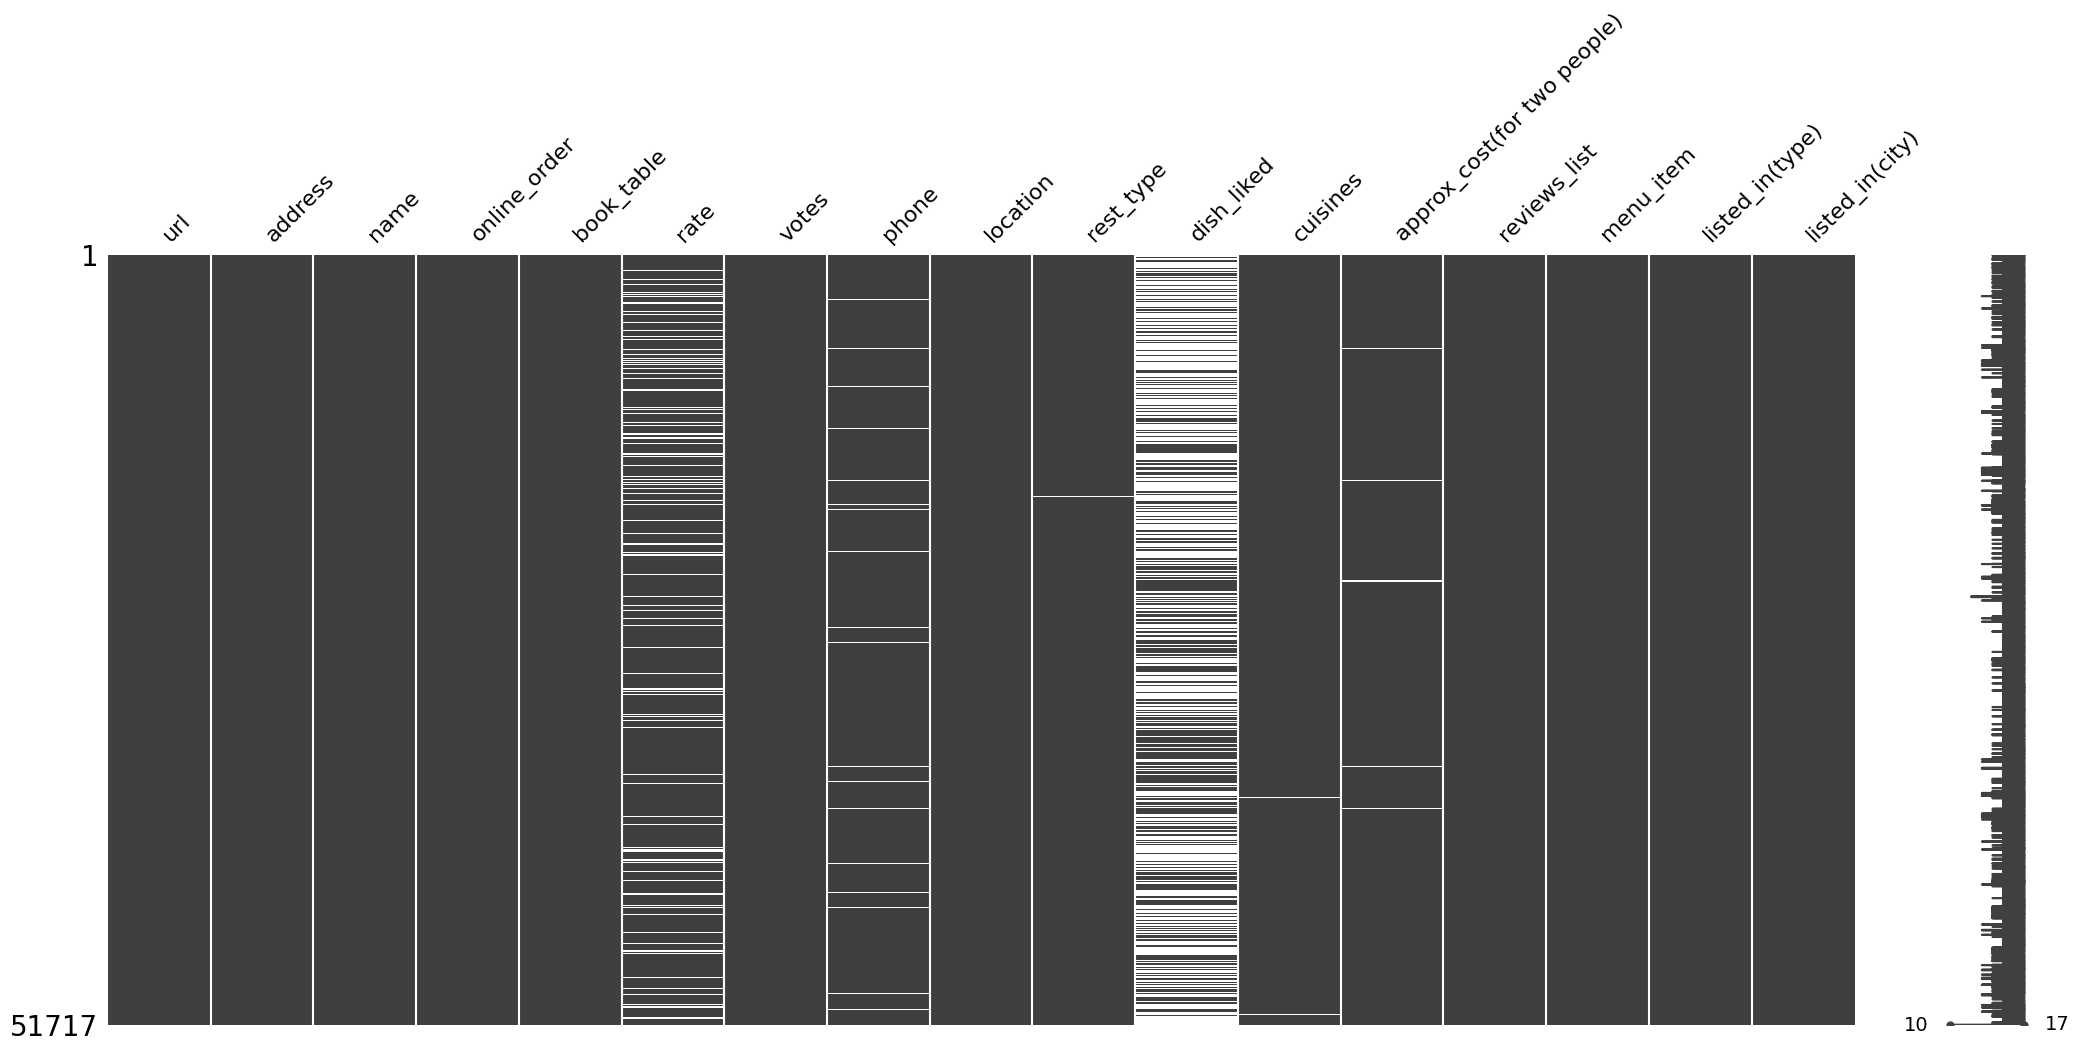

In [12]:
# visualize missing values
msno.matrix(df_raw.sort_values('location'));
# this shows the correlation between missing values, so dish liked and rate has the most and approx cost is scattered

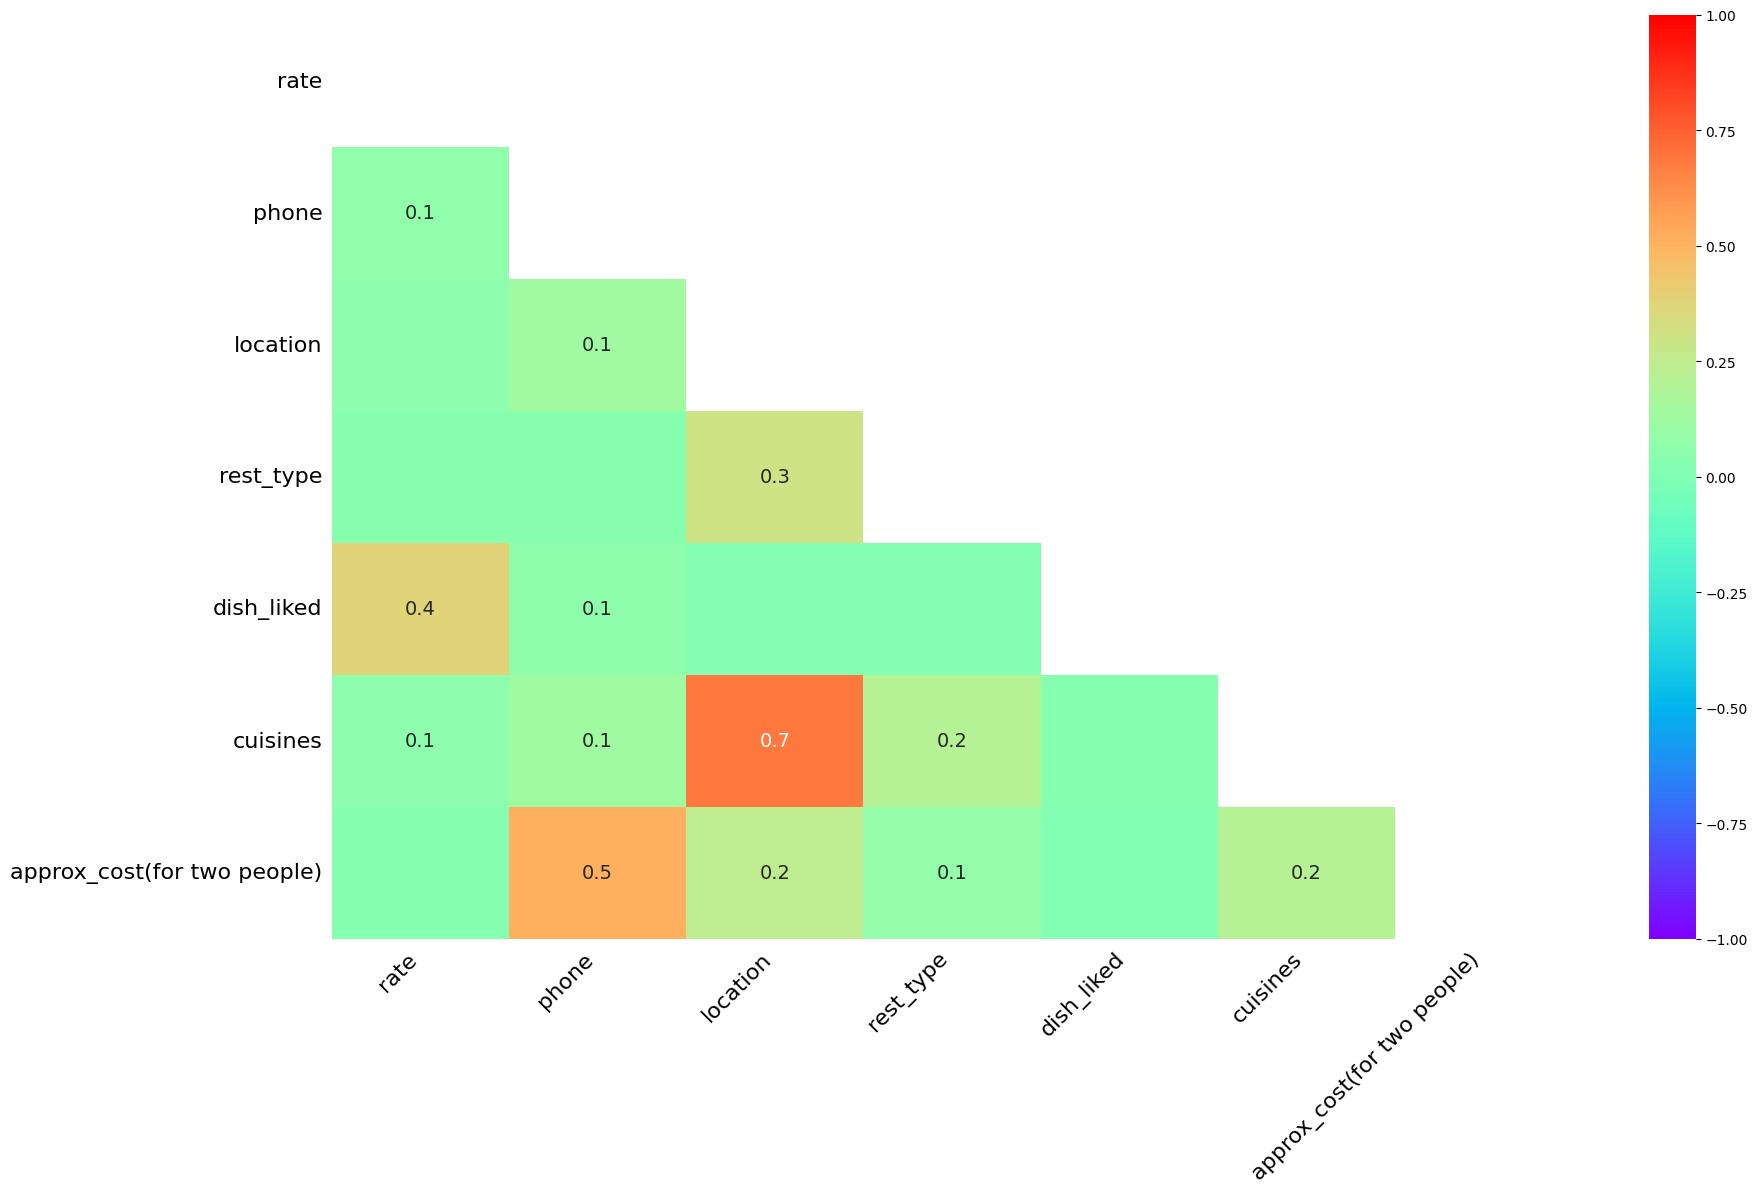

In [13]:
msno.heatmap(df_raw, cmap='rainbow');
#cuisines and location have the most in common nulls as we ll as approx_cost and phone

### From the above, the below steps will be required to effectivley clean the data and prepare for further analysis
    1. change column names to appropriate names
    2. check for any extra white spaces and removing them.
    3. column rate will include only the main rate (3.5) instead of (3.5/5) after ensuring all rates are /5
    4. check the dtype of each column & change it to appropriate dtype.
    5. replace the null values of location column with the respective value in listed_in(city) column.
    6. create a new dataframe for the restaurant contact including columns (url, address, phone, (listed_in(city) and location)) after exploding the phone column.
    7. Drop contact columns from the original dataframe.
    8. in column menu_item, replace empty lists with NaN.
    9. in column reviews_list, replace empty lists with NaN.
    10. prepare a spearate dataframe for the reviews list column and restaurant name with the reviews_list column exploded and separated into rating column and comment column to show the rating and comments.
    11. prepare a spearate dataframe for the menu_item column and restaurant name with the menu_item column exploded.
    12. Check for inconsistencies in columns (as the dataset contains multiple restaurant in the same column, their respective values in the other columns like (restaurant_type, cuisine_types and approx_cost_two) 
    13. Handle missing values.
    14. explode column cuisines for better analysis.

## 4. Handling missing values and Data Structuring

### 4.1. Change column names to appropriate names.

In [14]:
df_raw.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
#make a copy of the dataframe to keeo the original
df = df_raw.copy()

In [16]:
# Create a dictionary to map old column names to new ones
new_column_names = {
    'url': 'restaurant_url',
    'address': 'restaurant_address',
    'name': 'restaurant_name',
    'online_order': 'has_online_order',
    'book_table': 'has_table_booking',
    'rate': 'restaurant_rating',
    'votes': 'votes_count',
    'phone': 'contact_number',
    'location': 'restaurant_location',
    'rest_type': 'restaurant_type',
    'dish_liked': 'popular_dishes',
    'cuisines': 'cuisine_types',
    'approx_cost(for two people)': 'approx_cost_two',
    'reviews_list': 'customer_reviews',
    'menu_item': 'menu_items',
    'listed_in(type)': 'listing_category',
    'listed_in(city)': 'city'
}

In [17]:
#rename the columns
df.rename(columns = new_column_names, inplace = True)

In [18]:
#inspect changes
df.columns
#AWESOME!

Index(['restaurant_url', 'restaurant_address', 'restaurant_name',
       'has_online_order', 'has_table_booking', 'restaurant_rating',
       'votes_count', 'contact_number', 'restaurant_location',
       'restaurant_type', 'popular_dishes', 'cuisine_types', 'approx_cost_two',
       'customer_reviews', 'menu_items', 'listing_category', 'city'],
      dtype='object')

### 4.2. Check for any extra white spaces and remove them

In [19]:
# Check for extra white spaces in the entire DataFrame
df.map(lambda x: isinstance(x, str) and x.strip() != x).any()
#This will return True for columns that have extra spaces.

restaurant_url         False
restaurant_address     False
restaurant_name        False
has_online_order       False
has_table_booking      False
restaurant_rating      False
votes_count            False
contact_number         False
restaurant_location    False
restaurant_type        False
popular_dishes         False
cuisine_types          False
approx_cost_two        False
customer_reviews       False
menu_items             False
listing_category       False
city                   False
dtype: bool

In [20]:
# great, in case there were extra white spaces, the following code can be applied.
# Strip leading and trailing spaces from all string columns
#df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

### 4.3. column (rate) will include only the main rate (3.5) instead of (3.5/5) after ensuring all rates are /5

In [21]:
# Filter rows where 'restaurant_rating' does not contain '/5'
#invalid_ratings = df[~df['restaurant_rating'].str.contains(r'/5$', na=False)]

# Display the rows with invalid ratings
df['restaurant_rating'].value_counts()
#print(invalid_ratings)

restaurant_rating
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [22]:
#Replace NaN values with 'NEW'
df['restaurant_rating'] = df['restaurant_rating'].fillna('NEW')

In [23]:
#Extract the numeric part for ratings like '3.4/5' and keep 'NEW' for non-numeric values
df['restaurant_rating'] = df['restaurant_rating'].apply(lambda x: x.split('/')[0] if isinstance(x, str) and '/5' in x else x)

In [24]:
#If the value is a number, convert to float, else keep 'new'
df['restaurant_rating'] = df['restaurant_rating'].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else x)

In [25]:
print(df['restaurant_rating'].head(10))  # Print first 10 rows to verify

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
6    3.6
7    4.6
8    4.0
9    4.2
Name: restaurant_rating, dtype: object


### 4.4. check the dtype of each column & change it to appropriate dtype

* restaurant_url, restaurant_address, restaurant_name, contact_number, restaurant_location, restaurant_type, popular_dishes, cuisine_types, customer_reviews, menu_items, listing_category, city: These should be of object (string) type.

* has_online_order, has_table_booking: These columns contain yes/no or boolean-like values. we convert them to bool or object.

* restaurant_rating: This is likely a numeric value but stored as a string. It should be converted to float or object if it includes non-numeric values (like "Not Rated").

* votes_count: This is an integer, so it should be converted to int64.

* approx_cost_two: This represent a cost value, and if it's stored as a string with currency symbols or commas, we will convert it to float.

In [26]:
print(df.dtypes)

restaurant_url         object
restaurant_address     object
restaurant_name        object
has_online_order       object
has_table_booking      object
restaurant_rating      object
votes_count             int64
contact_number         object
restaurant_location    object
restaurant_type        object
popular_dishes         object
cuisine_types          object
approx_cost_two        object
customer_reviews       object
menu_items             object
listing_category       object
city                   object
dtype: object


In [27]:
df['has_online_order'].value_counts()

has_online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [28]:
df['has_table_booking'].value_counts()

has_table_booking
No     45268
Yes     6449
Name: count, dtype: int64

In [29]:
df.head(10)

,restaurant_url,restaurant_address,restaurant_name,has_online_order,has_table_booking,restaurant_rating,votes_count,contact_number,restaurant_location,restaurant_type,popular_dishes,cuisine_types,approx_cost_two,customer_reviews,menu_items,listing_category,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [30]:
# Convert data types
df['restaurant_url'] = df['restaurant_url'].astype('object')
df['restaurant_address'] = df['restaurant_address'].astype('object')
df['restaurant_name'] = df['restaurant_name'].astype('object')

# For boolean-like columns, convert to boolean
df['has_online_order'] = df['has_online_order'].map({'Yes': True, 'No': False}).astype('bool')
df['has_table_booking'] = df['has_table_booking'].map({'Yes': True, 'No': False}).astype('bool')

# Convert 'restaurant_rating' to float, handling possible non-numeric values (done above)
#df['restaurant_rating'] = pd.to_numeric(df['restaurant_rating'], errors='coerce')

# Convert 'votes_count' to integer
df['votes_count'] = df['votes_count'].astype('int64')

# Convert 'contact_number', 'restaurant_location', 'restaurant_type', 'popular_dishes', 'cuisine_types', 
# 'customer_reviews', 'menu_items', 'listing_category', 'city' to object (string)
df['contact_number'] = df['contact_number'].astype('object')
df['restaurant_location'] = df['restaurant_location'].astype('object')
df['restaurant_type'] = df['restaurant_type'].astype('object')
df['popular_dishes'] = df['popular_dishes'].astype('object')
df['cuisine_types'] = df['cuisine_types'].astype('object')
df['customer_reviews'] = df['customer_reviews'].astype('object')
df['menu_items'] = df['menu_items'].astype('object')
df['listing_category'] = df['listing_category'].astype('object')
df['city'] = df['city'].astype('object')

# For 'approx_cost_two', strip any non-numeric characters (like currency symbols) and convert to float
df['approx_cost_two'] = df['approx_cost_two'].replace({'\$': '', ',': ''}, regex=True).astype('float64')

# Check the data types after conversion
print(df.dtypes)

restaurant_url          object
restaurant_address      object
restaurant_name         object
has_online_order          bool
has_table_booking         bool
restaurant_rating       object
votes_count              int64
contact_number          object
restaurant_location     object
restaurant_type         object
popular_dishes          object
cuisine_types           object
approx_cost_two        float64
customer_reviews        object
menu_items              object
listing_category        object
city                    object
dtype: object


In [31]:
df.head(5)

,restaurant_url,restaurant_address,restaurant_name,has_online_order,has_table_booking,restaurant_rating,votes_count,contact_number,restaurant_location,restaurant_type,popular_dishes,cuisine_types,approx_cost_two,customer_reviews,menu_items,listing_category,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### 4.5. replace the null values of location column with the respective value in listed_in(city) column

In [32]:
df['restaurant_location'] = df['restaurant_location'].fillna(df['city'])

In [33]:
print(df['restaurant_location'].isnull().sum())  # Should return 0 if all nulls are filled

0


### 4.6. create a new dataframe for the restaurant contact including columns (url, address, phone, (listed_in(city) and location)) after exploding the phone column.

In [34]:
df.columns

Index(['restaurant_url', 'restaurant_address', 'restaurant_name',
       'has_online_order', 'has_table_booking', 'restaurant_rating',
       'votes_count', 'contact_number', 'restaurant_location',
       'restaurant_type', 'popular_dishes', 'cuisine_types', 'approx_cost_two',
       'customer_reviews', 'menu_items', 'listing_category', 'city'],
      dtype='object')

In [35]:
restaurant_contact_df = df[['restaurant_name', 'restaurant_url', 'contact_number', 'restaurant_location', 'city']].copy()

In [36]:
restaurant_contact_df.head()

,restaurant_name,restaurant_url,contact_number,restaurant_location,city
0,Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,080 42297555\r\n+91 9743772233,Banashankari,Banashankari
1,Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,080 41714161,Banashankari,Banashankari
2,San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,+91 9663487993,Banashankari,Banashankari
3,Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,+91 9620009302,Banashankari,Banashankari
4,Grand Village,https://www.zomato.com/bangalore/grand-village...,+91 8026612447\r\n+91 9901210005,Basavanagudi,Banashankari


In [37]:
# clean the dataset by exploding the phone column
# Step 1: Split the 'phone' column by '\r\n' to create a list of phone numbers
restaurant_contact_df['contact_number'] = restaurant_contact_df['contact_number'].str.split(r'\r\n')

# Step 2: Explode the 'phone' column into separate rows (within the same df)
restaurant_contact_df = restaurant_contact_df.explode('contact_number', ignore_index=True)

# Step 3: Standardize the phone numbers to ensure they start with '+'
restaurant_contact_df['contact_number'] = restaurant_contact_df['contact_number'].apply(lambda x: x if str(x).startswith('+') else f'+{x}')

# Optional: Clean phone numbers by removing unwanted characters (like '\r')
restaurant_contact_df['contact_number'] = restaurant_contact_df['contact_number'].str.replace(r'\r', '', regex=True)

# Display the updated DataFrame
print(restaurant_contact_df[['restaurant_name', 'contact_number']].head())

         restaurant_name  contact_number
0                  Jalsa   +080 42297555
1                  Jalsa  +91 9743772233
2         Spice Elephant   +080 41714161
3        San Churro Cafe  +91 9663487993
4  Addhuri Udupi Bhojana  +91 9620009302


### 4.7. Drop contact columns from the original dataframe

In [38]:
df.columns

Index(['restaurant_url', 'restaurant_address', 'restaurant_name',
       'has_online_order', 'has_table_booking', 'restaurant_rating',
       'votes_count', 'contact_number', 'restaurant_location',
       'restaurant_type', 'popular_dishes', 'cuisine_types', 'approx_cost_two',
       'customer_reviews', 'menu_items', 'listing_category', 'city'],
      dtype='object')

In [39]:
df = df.drop(columns = ['restaurant_url', 'restaurant_address', 'contact_number'])
df.columns

Index(['restaurant_name', 'has_online_order', 'has_table_booking',
       'restaurant_rating', 'votes_count', 'restaurant_location',
       'restaurant_type', 'popular_dishes', 'cuisine_types', 'approx_cost_two',
       'customer_reviews', 'menu_items', 'listing_category', 'city'],
      dtype='object')

### 4.8. in column menu_item, replace empty lists with NaN.

In [40]:
df['menu_items'] = df['menu_items'].apply(
    lambda x: np.nan if x == [] or x == "[]" else x)
#df['menu_items'] = df['menu_items'].apply(lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x)

### 4.9. in column customer_review replace empty lists with nan

In [41]:
df['customer_reviews'] = df['customer_reviews'].apply(
    lambda x: np.nan if x == [] or x == "[]" else x)
#df['customer_reviews'] = df['customer_reviews'].apply(lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x)

In [42]:
df.sample(10)

,restaurant_name,has_online_order,has_table_booking,restaurant_rating,votes_count,restaurant_location,restaurant_type,popular_dishes,cuisine_types,approx_cost_two,customer_reviews,menu_items,listing_category,city
35566,Just Chill,True,False,3.4,54,BTM,Beverage Shop,NaN,Beverages,250.0,"[('Rated 1.0', 'RATED\n Ordered falooda which...",NaN,Delivery,Koramangala 7th Block
10949,Anjappar,False,False,3.9,1155,Koramangala 4th Block,Casual Dining,"Tandoori Chicken, Biryani, Chettinad Thali, El...","Chettinad, South Indian",650.0,"[('Rated 4.0', ""RATED\n Had non veg meals her...",NaN,Dine-out,BTM
21230,Wahab,True,False,3.7,97,Jayanagar,Quick Bites,"Chicken Biryani, Rolls","North Indian, Mughlai, Chinese",350.0,"[('Rated 2.0', 'RATED\n Ordered chicken kabab...","['Chilly Chicken Roll', 'Lemon Chicken Roll', ...",Dine-out,Jayanagar
27172,InnerChef,True,False,3.8,153,Koramangala 7th Block,Delivery,"Pasta, Salads, Chole, Butter Chicken, Brownie,...","North Indian, Continental",500.0,"[('Rated 2.0', 'RATED\n Food is nice, no doub...",NaN,Delivery,Koramangala 4th Block
51280,Waah Chef,False,False,NEW,0,Whitefield,Casual Dining,NaN,"Biryani, Mughlai, Chinese, North Indian",600.0,NaN,NaN,Dine-out,Whitefield
24312,Venky's Xprs,False,False,3.7,35,Kalyan Nagar,"Quick Bites, Meat Shop",NaN,"Fast Food, Raw Meats",350.0,"[('Rated 4.0', 'RATED\n This is a small outle...",NaN,Delivery,Kalyan Nagar
29683,Hungerbreak 24x7,True,False,3.0,7,Koramangala 8th Block,Delivery,NaN,"North Indian, South Indian, Maharashtrian",300.0,"[('Rated 1.0', ""RATED\n I had ordered chicken...",NaN,Delivery,Koramangala 5th Block
13876,Rara Avis,False,False,NEW,0,Electronic City,"Takeaway, Delivery",NaN,"Kerala, Seafood, Biryani, Desserts",400.0,NaN,NaN,Delivery,Electronic City
47869,Mughals Restaurant,False,False,3.1,17,Shivajinagar,Casual Dining,NaN,"Mughlai, North Indian, Chinese, Biryani, Seafood",550.0,"[('Rated 5.0', 'RATED\n Very good food, quit ...",NaN,Delivery,Residency Road
47769,Priya's Punjabi,False,False,3.8,33,Koramangala 8th Block,Casual Dining,NaN,North Indian,NaN,"[('Rated 3.0', ""RATED\n Hello foodies\nOne mo...",NaN,Delivery,Residency Road


In [43]:
df.columns

Index(['restaurant_name', 'has_online_order', 'has_table_booking',
       'restaurant_rating', 'votes_count', 'restaurant_location',
       'restaurant_type', 'popular_dishes', 'cuisine_types', 'approx_cost_two',
       'customer_reviews', 'menu_items', 'listing_category', 'city'],
      dtype='object')

In [44]:
df.isnull().sum()

restaurant_name            0
has_online_order           0
has_table_booking          0
restaurant_rating          0
votes_count                0
restaurant_location        0
restaurant_type          227
popular_dishes         28078
cuisine_types             45
approx_cost_two          346
customer_reviews        7595
menu_items             39617
listing_category           0
city                       0
dtype: int64

### 4.10. prepare a spearate dataframe for the reviews list column and restaurant name with the reviews_list column exploded and separated into rating column and comment column to show the rating and comments.

In [45]:
restaurant_reviews_df = df[['restaurant_name', 'restaurant_type', 'customer_reviews']].copy()

In [46]:
# drop the customer reviews column from the original dataset
df = df.drop(columns = 'customer_reviews')
df.columns

Index(['restaurant_name', 'has_online_order', 'has_table_booking',
       'restaurant_rating', 'votes_count', 'restaurant_location',
       'restaurant_type', 'popular_dishes', 'cuisine_types', 'approx_cost_two',
       'menu_items', 'listing_category', 'city'],
      dtype='object')

### 4.11. prepare a spearate dataframe for the menu_item column and restaurant name with the menu_item column exploded.

In [47]:
menu_items_df = df[['restaurant_name', 'restaurant_type', 'menu_items']]

In [48]:
#drop the menu item columns from the original dataset
df = df.drop(columns = 'menu_items')

### 4.12. prepare a spearate dataframe for the popular_dishes column and restaurant name with the menu_item column exploded.

In [49]:
popular_dishes_df = df[['restaurant_name', 'restaurant_type', 'popular_dishes']].copy()

In [50]:
#drop the popular_dishes column from the original dataset
df = df.drop(columns = 'popular_dishes')
df.columns

Index(['restaurant_name', 'has_online_order', 'has_table_booking',
       'restaurant_rating', 'votes_count', 'restaurant_location',
       'restaurant_type', 'cuisine_types', 'approx_cost_two',
       'listing_category', 'city'],
      dtype='object')

### 4.12. Check for inconsistencies in columns (as the dataset contains multiple restaurant in the same column, their respective values in the other columns like (restaurant_type, cuisine_types and approx_cost_two)

In [51]:
df.isnull().sum()

restaurant_name          0
has_online_order         0
has_table_booking        0
restaurant_rating        0
votes_count              0
restaurant_location      0
restaurant_type        227
cuisine_types           45
approx_cost_two        346
listing_category         0
city                     0
dtype: int64

In [52]:
# Step 1: Compute the most frequent 'restaurant_type' for each 'restaurant_name'
restaurant_type_mode = df.groupby('restaurant_name')['restaurant_type'].agg(lambda x: x.mode()[0] if not x.isnull().all() else None)

# Step 2: Create a new column to hold the repaired 'restaurant_type'
# We map the most frequent 'restaurant_type' to the new 'repaired_restaurant_type' column
df['repaired_restaurant_type'] = df['restaurant_name'].map(restaurant_type_mode)

# Step 3: Ensure the original 'restaurant_type' stays the same
# Do not modify the original 'restaurant_type', but use the repaired values only in the 'repaired_restaurant_type' column

# Step 4: Verify if there are any remaining inconsistencies
grouped_repaired = df.groupby('restaurant_name')['restaurant_type'].nunique()

# Find restaurant names where 'restaurant_type' has more than 1 unique value
inconsistent_restaurants_repaired = grouped_repaired[grouped_repaired > 1].index

# Get the rows where these inconsistencies are present
inconsistent_data_repaired = df[df['restaurant_name'].isin(inconsistent_restaurants_repaired)]

# Display repaired data
print(inconsistent_data_repaired)

               restaurant_name  has_online_order  has_table_booking  \
23                My Tea House              True              False   
28                       Cuppa             False              False   
31                  Foodiction              True              False   
32                 Sweet Truth              True              False   
33             Ovenstory Pizza              True              False   
...                        ...               ...                ...   
51685               Biergarten             False               True   
51691  Uno Chicago Bar & Grill             False               True   
51699       Harry's Bar + Cafe              True               True   
51708   Keys Cafe - Keys Hotel             False              False   
51711                  Bhagini             False              False   

      restaurant_rating  votes_count restaurant_location     restaurant_type  \
23                  3.6           62        Banashankari   Quick Bi

In [53]:
rows_with_diff = df[df['restaurant_type'] != df['repaired_restaurant_type']]

# Step 4: Show only the row indices where the values are different
print("Row indices where 'restaurant_type' and 'repaired_restaurant_type' are different:")
print(rows_with_diff)

Row indices where 'restaurant_type' and 'repaired_restaurant_type' are different:
          restaurant_name  has_online_order  has_table_booking  \
23           My Tea House              True              False   
50                  Petoo             False              False   
53      Biryanis And More              True              False   
84              Chill Out             False              False   
90         Me And My Cake             False              False   
...                   ...               ...                ...   
51660  Harry's Bar + Cafe              True               True   
51677             Bhagini             False              False   
51685          Biergarten             False               True   
51699  Harry's Bar + Cafe              True               True   
51711             Bhagini             False              False   

      restaurant_rating  votes_count restaurant_location     restaurant_type  \
23                  3.6           62        B

In [54]:
# Check how many unique 'restaurant_type' values there are for each 'restaurant_name'
restaurant_type_count = df.groupby('restaurant_name')['restaurant_type'].nunique()

# Filter restaurants that have more than 1 unique type
inconsistent_restaurants = restaurant_type_count[restaurant_type_count > 1]

# Show the restaurant names that have inconsistent types
print("Restaurants with multiple types:")
print(inconsistent_restaurants)

Restaurants with multiple types:
restaurant_name
36th Cross Coffee Mane    2
5 Degree Centigrade       2
7 Plates                  2
7th Heaven                2
9 Bowls                   3
                         ..
Zeeshan                   2
Zoey's                    2
eat.fit                   3
iSpice Resto Cafe         2
nu.tree                   4
Name: restaurant_type, Length: 619, dtype: int64


In [55]:
# Step 1: Compute the most frequent 'cuisine_types' for each 'restaurant_name'
cuisine_types_mode = df.groupby('restaurant_name')['cuisine_types'].agg(lambda x: x.mode()[0] if not x.isnull().all() else None)

# Step 2: Create a new column to hold the repaired 'cuisine_types'
# We map the most frequent 'cuisine_types' to the new 'repaired_cuisine_types' column
df['repaired_cuisine_types'] = df['restaurant_name'].map(cuisine_types_mode)

# Step 3: Ensure the original 'cuisine_types' stays the same
# Do not modify the original 'cuisine_types', but use the repaired values only in the 'repaired_cuisine_types' column

# Step 4: Verify if there are any remaining inconsistencies
cuisine_grouped_repaired = df.groupby('restaurant_name')['cuisine_types'].nunique()

# Find restaurant names where 'cuisine_types' has more than 1 unique value
inconsistent_cuisine_repaired = cuisine_grouped_repaired[cuisine_grouped_repaired > 1].index

# Get the rows where these inconsistencies are present
inconsistent_data_repaired = df[df['cuisine_types'].isin(inconsistent_cuisine_repaired)]

# Display repaired data
print(inconsistent_data_repaired)

Empty DataFrame
Columns: [restaurant_name, has_online_order, has_table_booking, restaurant_rating, votes_count, restaurant_location, restaurant_type, cuisine_types, approx_cost_two, listing_category, city, repaired_restaurant_type, repaired_cuisine_types]
Index: []


In [56]:
rows_with_diff = df[df['cuisine_types'] != df['repaired_cuisine_types']]

# Step 4: Show only the row indices where the values are different
print("Row indices where 'cuisine_types' and 'repaired_cuisine_types' are different:")
print(rows_with_diff)

Row indices where 'cuisine_types' and 'repaired_cuisine_types' are different:
                   restaurant_name  has_online_order  has_table_booking  \
23                    My Tea House              True              False   
31                      Foodiction              True              False   
47                          Recipe              True              False   
50                           Petoo             False              False   
56     Banashankari Donne Biriyani              True              False   
...                            ...               ...                ...   
51643            New Ambur Biryani             False              False   
51649                   Biergarten             False               True   
51662                The Beer Cafe              True               True   
51685                   Biergarten             False               True   
51701                The Beer Cafe              True               True   

      restaurant_rati

In [57]:
# Check how many unique 'restaurant_type' values there are for each 'restaurant_name'
cuisine_type_count = df.groupby('restaurant_name')['cuisine_types'].nunique()

# Filter restaurants that have more than 1 unique type
inconsistent_cuisine = cuisine_type_count[cuisine_type_count > 1]

# Show the restaurant names that have inconsistent types
print("Restaurants with multiple cuisine types:")
print(inconsistent_cuisine)

Restaurants with multiple cuisine types:
restaurant_name
1947                      2
36th Cross Coffee Mane    2
7 Plates                  2
7th Heaven                2
9 Bowls                   2
                         ..
Zeeshan                   2
Zoey's                    2
Zu's Doner Kebaps         2
eat.fit                   5
iSpice Resto Cafe         2
Name: cuisine_types, Length: 912, dtype: int64


In [58]:
# Step 1: Compute the most frequent 'approx_cost_two' for each 'restaurant_name'
approx_cost_two_mode = df.groupby('restaurant_name')['approx_cost_two'].agg(lambda x: x.mode()[0] if not x.isnull().all() else None)

# Step 2: Create a new column to hold the repaired 'approx_cost_two'
# We map the most frequent 'approx_cost_two' to the new 'repaired_approx_cost_two' column
df['repaired_approx_cost_two'] = df['restaurant_name'].map(approx_cost_two_mode)

# Step 3: Ensure the original 'approx_cost_two' stays the same
# Do not modify the original 'approx_cost_two', but use the repaired values only in the 'repaired_approx_cost_two' column

# Step 4: Verify if there are any remaining inconsistencies
grouped_repaired = df.groupby('restaurant_name')['approx_cost_two'].nunique()

# Find restaurant names where 'restaurant_type' has more than 1 unique value
inconsistent_restaurants_repaired = grouped_repaired[grouped_repaired > 1].index

# Get the rows where these inconsistencies are present
inconsistent_data_repaired = df[df['restaurant_name'].isin(inconsistent_restaurants_repaired)]

# Display repaired data
print(inconsistent_data_repaired)

               restaurant_name  has_online_order  has_table_booking  \
0                        Jalsa              True               True   
22             Cafe Coffee Day             False              False   
23                My Tea House              True              False   
28                       Cuppa             False              False   
33             Ovenstory Pizza              True              False   
...                        ...               ...                ...   
51685               Biergarten             False               True   
51691  Uno Chicago Bar & Grill             False               True   
51693         One For The Road              True               True   
51699       Harry's Bar + Cafe              True               True   
51701            The Beer Cafe              True               True   

      restaurant_rating  votes_count restaurant_location     restaurant_type  \
0                   4.1          775        Banashankari       Casu

In [59]:
rows_with_diff = df[df['approx_cost_two'] != df['repaired_approx_cost_two']]

# Step 4: Show only the row indices where the values are different
print("Row indices where 'approx_cost_two' and 'repaired_approx_cost_two' are different:")
print(rows_with_diff)

Row indices where 'approx_cost_two' and 'repaired_approx_cost_two' are different:
          restaurant_name  has_online_order  has_table_booking  \
23           My Tea House              True              False   
43         Domino's Pizza              True              False   
47                 Recipe              True              False   
50                  Petoo             False              False   
58      Five Star Chicken             False              False   
...                   ...               ...                ...   
51660  Harry's Bar + Cafe              True               True   
51662       The Beer Cafe              True               True   
51685          Biergarten             False               True   
51699  Harry's Bar + Cafe              True               True   
51701       The Beer Cafe              True               True   

      restaurant_rating  votes_count restaurant_location    restaurant_type  \
23                  3.6           62        Ba

In [60]:
# Check how many unique 'approx_cost_two' values there are for each 'restaurant_name'
approx_cost_two_count = df.groupby('restaurant_name')['approx_cost_two'].nunique()

# Filter restaurants that have more than 1 unique type
inconsistent_restaurants = approx_cost_two_count[approx_cost_two_count > 1]

# Show the restaurant names that have inconsistent types
print("Restaurants with multiple approx_cost_two:")
print(inconsistent_restaurants)

Restaurants with multiple approx_cost_two:
restaurant_name
1947                      3
36th Cross Coffee Mane    2
7 Plates                  2
7th Heaven                2
99 Pancakes               3
                         ..
Zamindar                  2
Zee5 Loft                 2
Zeeshan                   2
eat.fit                   2
iSpice Resto Cafe         2
Name: approx_cost_two, Length: 810, dtype: int64


In [61]:
df.head()

,restaurant_name,has_online_order,has_table_booking,restaurant_rating,votes_count,restaurant_location,restaurant_type,cuisine_types,approx_cost_two,listing_category,city,repaired_restaurant_type,repaired_cuisine_types,repaired_approx_cost_two
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,Casual Dining,"North Indian, Rajasthani",600.0


### The consistencies are resolved and inputed in a new column which will be analyzed.
* noting that these inconsistencies can occur due to data entry or that the restuarant offer different service (type, cost and cuisine) based on the location.

### 4.13. Handle missing values.
* since deleting missing values can sometimes result in non-efficient analysis, so we will record the data to be cleaned and will only hanlde the missing values when plotting to avoid removing wanted data.

In [62]:
df.isnull().sum()

restaurant_name               0
has_online_order              0
has_table_booking             0
restaurant_rating             0
votes_count                   0
restaurant_location           0
restaurant_type             227
cuisine_types                45
approx_cost_two             346
listing_category              0
city                          0
repaired_restaurant_type    116
repaired_cuisine_types       12
repaired_approx_cost_two    145
dtype: int64

### 4.14. explode columns cuisines and restuarant type for better analysis.
* This will be done when analyzing also to avoid repeating data before analysis

## 5. Analysis and vizualisation of the data

### 5.1. Univariate Analysis
#### 5.1.1. Distribution of has_online_order.
#### 5.1.2. Distribution of restaurant_rating.
#### 5.1.3. Top 10 most common cuisine_types, repaired_cusinine_types.
#### 5.1.4. Word Cloud for popular_dishes.

### 5.2. Bivariate Analysis
#### 5.2.1. Relationship between votes_count and restaurant_rating.
#### 5.2.2. Boxplot of restaurant_rating by has_online_order.
#### 5.2.3. Cost Distribution by restaurant_type.

### 5.3. Multivariate Analysis
#### 5.3.1. votes_count vs restaurant_rating grouped by has_online_order.
#### 5.3.2. Heatmap of Average Cost by city and restaurant_type.
#### 5.3.3. Bar plot of restaurant_type across city with average votes_count.

### 5.1. Univariate Analysis

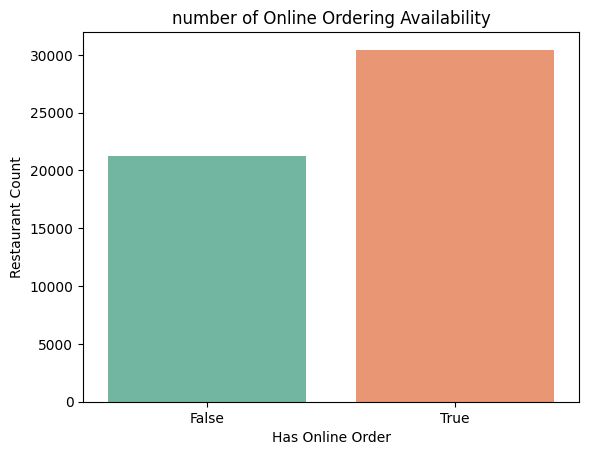

In [63]:
#5.1.1. Distribution of has_online_order
# Plot for 'has_online_order'
sns.countplot(data=df, x='has_online_order', palette='Set2')
plt.title('number of Online Ordering Availability')
plt.xlabel('Has Online Order')
plt.ylabel('Restaurant Count')
plt.show()
#this graph shows that there alot of restaurants that still don't apply online ordering which should be resolved

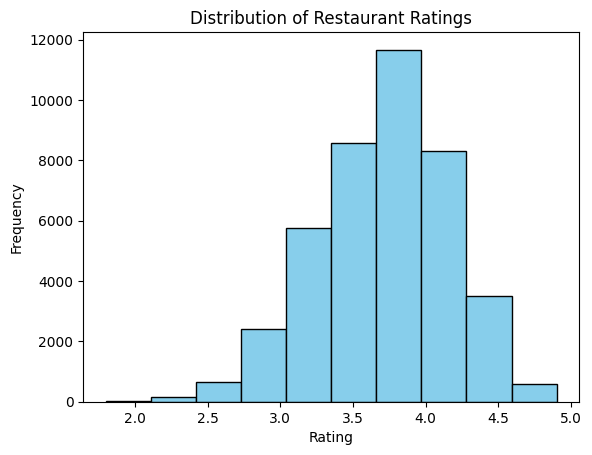

In [64]:
# 5.1.2. Distribution of restaurant_rating
df['restaurant_rating'] = pd.to_numeric(df['restaurant_rating'], errors='coerce')
# Plot for 'restaurant_rating'
plt.hist(df['restaurant_rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
#this shows that most restaurants are rated between 3.5 and 4.0 which is not good as it is best to be always above 4.0
# most of the restaurants on the website should improve their service.

In [65]:
#5.1.3. Top 10 most common cuisine types
# Create a copy and explode 'cuisine_types'
exploded_cuisines_df = df.copy()
exploded_cuisines_df['cuisine_types'] = exploded_cuisines_df['cuisine_types'].dropna().str.split(', ')
exploded_cuisines_df = exploded_cuisines_df.explode('cuisine_types')

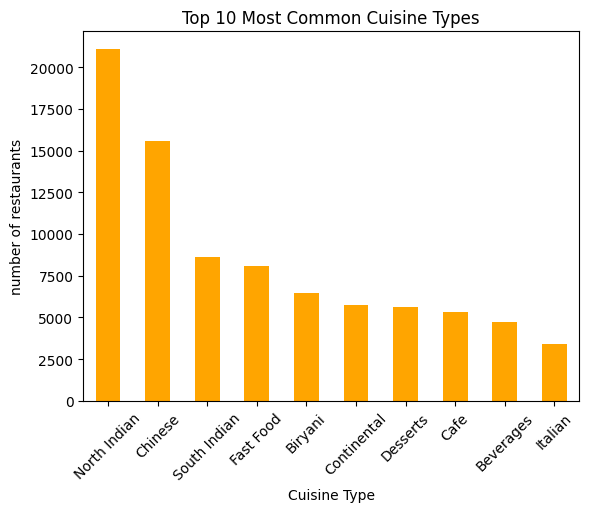

In [66]:
# top 10 cuisines in the exploded DataFrame
top_cuisines = exploded_cuisines_df['cuisine_types'].value_counts().head(10)

# Bar plot for top cuisines
top_cuisines.plot(kind='bar', color='orange')
plt.title('Top 10 Most Common Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('number of restaurants')
plt.xticks(rotation=45)
plt.show()
#North Indian and Chinese food are the top most common cuisine types
#other cuisines types have similar occurances

In [67]:
#5.1.4. Word cloud for popular dishes
# Split and explode 'popular_dishes'
popular_dishes_df['popular_dishes'] = popular_dishes_df['popular_dishes'].dropna().str.split(', ')
df_exploded_dishes = popular_dishes_df.explode('popular_dishes')

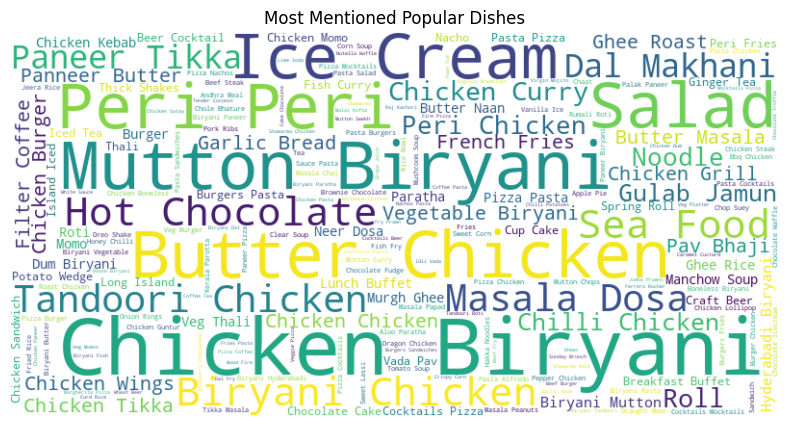

In [68]:
from wordcloud import WordCloud

# Generate word cloud from exploded DataFrame
text = " ".join(df_exploded_dishes['popular_dishes'].dropna())

wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Mentioned Popular Dishes')
plt.show()
# Its Obvious (^_^)

### 5.2. Bivariate Analysis

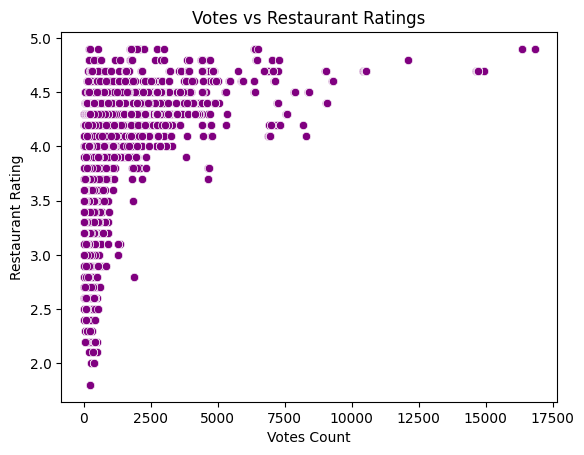

In [69]:
#5.2.1. Relationship between votes_count and restaurant_rating
sns.scatterplot(data=df, x='votes_count', y='restaurant_rating', color='purple')
plt.title('Votes vs Restaurant Ratings')
plt.xlabel('Votes Count')
plt.ylabel('Restaurant Rating')
plt.show()
# as the vote count increases, the rating increases.
# the website should encourge more customers to vote as it will affect the ratings in a good way

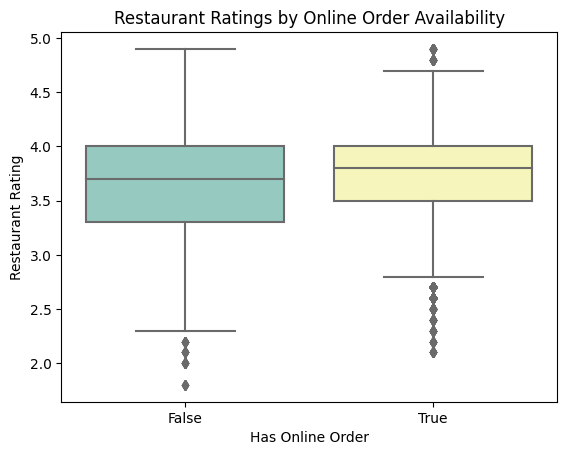

In [70]:
#5.2.2.  Boxplot of restaurant_rating by has_online_order
sns.boxplot(data=df, x='has_online_order', y='restaurant_rating', palette='Set3')
plt.title('Restaurant Ratings by Online Order Availability')
plt.xlabel('Has Online Order')
plt.ylabel('Restaurant Rating')
plt.show()
# the restaurant rating is higher for restaurants with online ordering.
# this should encourage restaurants to start online ordering.

In [71]:
df.columns

Index(['restaurant_name', 'has_online_order', 'has_table_booking',
       'restaurant_rating', 'votes_count', 'restaurant_location',
       'restaurant_type', 'cuisine_types', 'approx_cost_two',
       'listing_category', 'city', 'repaired_restaurant_type',
       'repaired_cuisine_types', 'repaired_approx_cost_two'],
      dtype='object')

In [72]:
#5.2.3. Cost Distribution by restaurant_type:
# Create a copy and explode 'restaurant_type'
exploded_restaurant_type_df = df[['approx_cost_two', 'restaurant_type']].copy()
# exploded_restaurant_type_df['restaurant_type'] = exploded_restaurant_type_df['restaurant_type'].dropna().str.split(', ')
# exploded_restaurant_type_df = exploded_restaurant_type_df.explode('restaurant_type')

In [73]:
exploded_restaurant_type_df.head()

,approx_cost_two,restaurant_type
0,800.0,Casual Dining
1,800.0,Casual Dining
2,800.0,"Cafe, Casual Dining"
3,300.0,Quick Bites
4,600.0,Casual Dining


In [74]:
#removing nulls values
exploded_restaurant_type_df = exploded_restaurant_type_df.dropna(subset=['restaurant_type'])

In [75]:
#removing null values
exploded_restaurant_type_df = exploded_restaurant_type_df.dropna(subset=['approx_cost_two'])

In [76]:
#splitting the inputs and exploding the column
exploded_restaurant_type_df['restaurant_type'] = exploded_restaurant_type_df['restaurant_type'].str.split(', ')
exploded_restaurant_type_df = exploded_restaurant_type_df.explode('restaurant_type')

In [77]:
#verifying
exploded_restaurant_type_df.isnull().sum()

approx_cost_two    0
restaurant_type    0
dtype: int64

In [78]:
exploded_restaurant_type_df.sample(10)

,approx_cost_two,restaurant_type
35577,300.0,Dessert Parlor
5244,400.0,Cafe
22188,600.0,Casual Dining
24483,300.0,Quick Bites
9101,600.0,Casual Dining
14622,400.0,Cafe
17296,300.0,Quick Bites
40579,400.0,Takeaway
13928,350.0,Quick Bites
2168,300.0,Quick Bites


In [79]:
# Get the top 10 restaurant types
top_10_restaurant_types = (
    exploded_restaurant_type_df['restaurant_type']
    .value_counts()
    .head(10)
    .index
)

# Filter the DataFrame for top 10 restaurant types
top_10_df = exploded_restaurant_type_df[exploded_restaurant_type_df['restaurant_type'].isin(top_10_restaurant_types)]

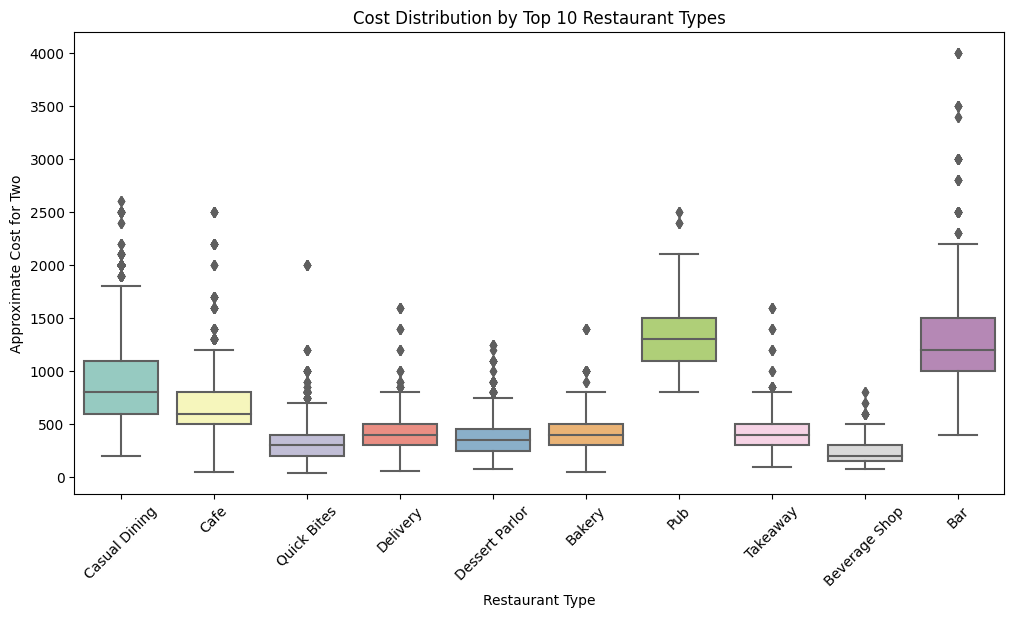

In [80]:
# Boxplot for cost distribution

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_df, x='restaurant_type', y='approx_cost_two', palette='Set3')
plt.title('Cost Distribution by Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Approximate Cost for Two')
plt.xticks(rotation=45)
plt.show()
#the graph shows that the bars and pubs have the highest cost for two
#the graph shows that quick butes and beverage shops have the least cost for two

### 5.3. Multivariate Analysis

In [81]:
df.isnull().sum()

restaurant_name                 0
has_online_order                0
has_table_booking               0
restaurant_rating           10052
votes_count                     0
restaurant_location             0
restaurant_type               227
cuisine_types                  45
approx_cost_two               346
listing_category                0
city                            0
repaired_restaurant_type      116
repaired_cuisine_types         12
repaired_approx_cost_two      145
dtype: int64

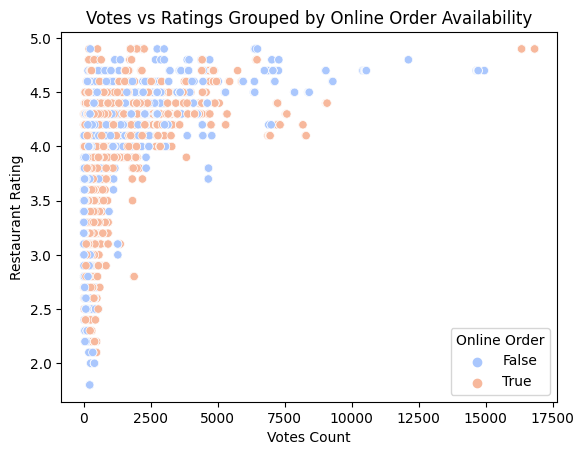

In [82]:
#5.3.1. votes_count vs restaurant_rating grouped by has_online_order
sns.scatterplot(data=df, x='votes_count', y='restaurant_rating', hue='has_online_order', palette='coolwarm')
plt.title('Votes vs Ratings Grouped by Online Order Availability')
plt.xlabel('Votes Count')
plt.ylabel('Restaurant Rating')
plt.legend(title='Online Order')
plt.show()
#having online orders increase the vote counts as well as the rating.
#most restaurants should include online ordering as it is has a huse impact on purchases as well as rating.

In [83]:
df.columns

Index(['restaurant_name', 'has_online_order', 'has_table_booking',
       'restaurant_rating', 'votes_count', 'restaurant_location',
       'restaurant_type', 'cuisine_types', 'approx_cost_two',
       'listing_category', 'city', 'repaired_restaurant_type',
       'repaired_cuisine_types', 'repaired_approx_cost_two'],
      dtype='object')

In [84]:
#5.3.2. HeatMap
# Top 10 cities based on frequency
top_cities = df['restaurant_location'].value_counts().head(10).index

# Top 10 restaurant types based on frequency
top_restaurant_types = df['restaurant_type'].str.split(', ').explode().value_counts().head(10).index

# Filter DataFrame for top cities and top restaurant types
filtered_df = df[df['restaurant_location'].isin(top_cities)]
filtered_df = filtered_df[filtered_df['restaurant_type'].isin(top_restaurant_types)]

In [85]:
# Clean and convert 'approx_cost_two'
filtered_df = (
    filtered_df
    .dropna(subset = ['approx_cost_two'])
)

# Create a pivot table for the heatmap
heatmap_data = (
    filtered_df.groupby(['restaurant_location', 'restaurant_type'])['approx_cost_two']
    .mean()
    .unstack()
)

In [86]:
filtered_df.isnull().sum()

restaurant_name                0
has_online_order               0
has_table_booking              0
restaurant_rating           3762
votes_count                    0
restaurant_location            0
restaurant_type                0
cuisine_types                  7
approx_cost_two                0
listing_category               0
city                           0
repaired_restaurant_type       0
repaired_cuisine_types         0
repaired_approx_cost_two       0
dtype: int64

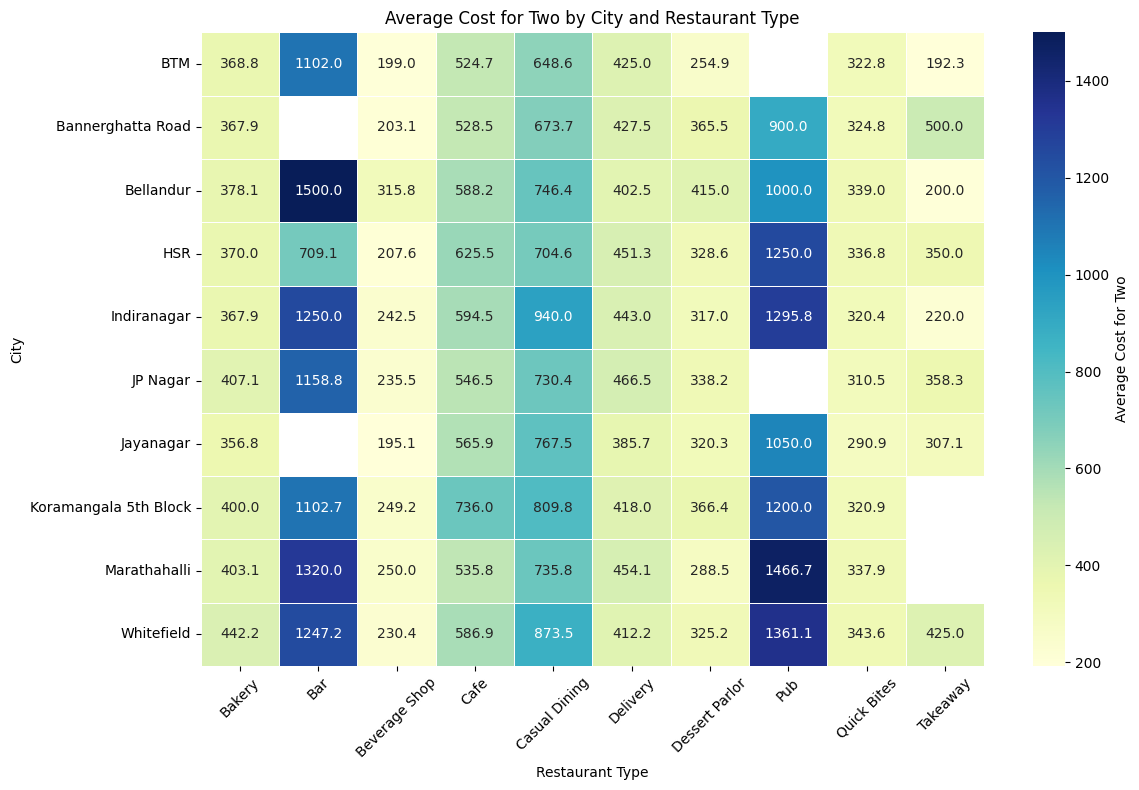

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Average Cost for Two'},
    linewidths=0.5
)
plt.title('Average Cost for Two by City and Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
# the heatmap shows that whitefield location has the most prices for restaurants
#Also Bars and Pubs have the highest cost in all locations
# from this heatmap, you can select the cheapest place to order depending on the location

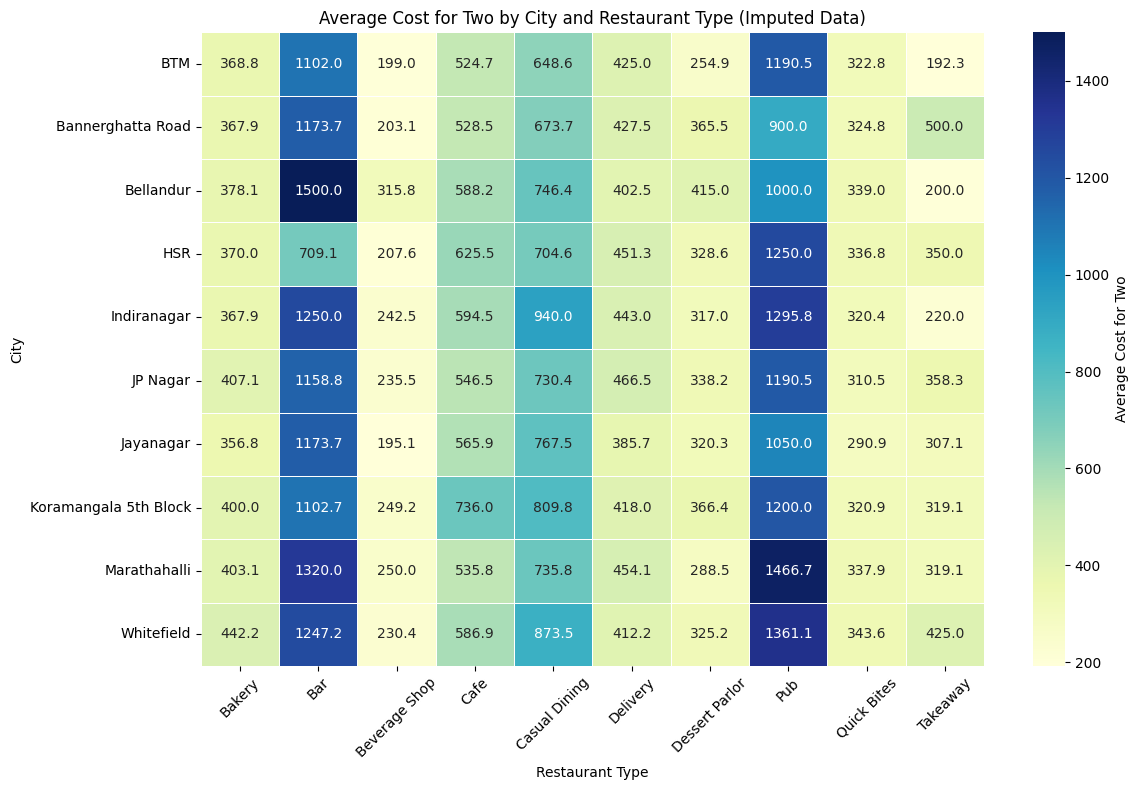

In [88]:
# Fill NaN values with the mean of the column, to avoid missing data in the heatmap
heatmap_data_imputed = heatmap_data.apply(lambda col: col.fillna(col.mean()), axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data_imputed,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Average Cost for Two'},
    linewidths=0.5
)
plt.title('Average Cost for Two by City and Restaurant Type (Imputed Data)')
plt.xlabel('Restaurant Type')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [89]:
#5.3.3. Bar plot of restaurant_type across city with average votes_count:
# Split and explode the 'restaurant_type' column
df_exploded = df.copy()
df_exploded['restaurant_type'] = df_exploded['restaurant_type'].dropna().str.split(', ')
df_exploded = df_exploded.explode('restaurant_type').reset_index(drop=True)

In [90]:
# Filter top 15 cities by frequency
top_15_cities = df_exploded['restaurant_location'].value_counts().head(15).index

# Filter the DataFrame for top cities
filtered_df = df_exploded[df_exploded['restaurant_location'].isin(top_15_cities)]

# Group by 'restaurant_type' and 'city', and calculate the mean of 'votes_count'
grouped_data = (
    filtered_df.groupby(['restaurant_location', 'restaurant_type'])['votes_count']
    .mean()
    .reset_index()
)

# Sort by 'votes_count' in descending order
sorted_data = grouped_data.sort_values(by='votes_count', ascending=False)

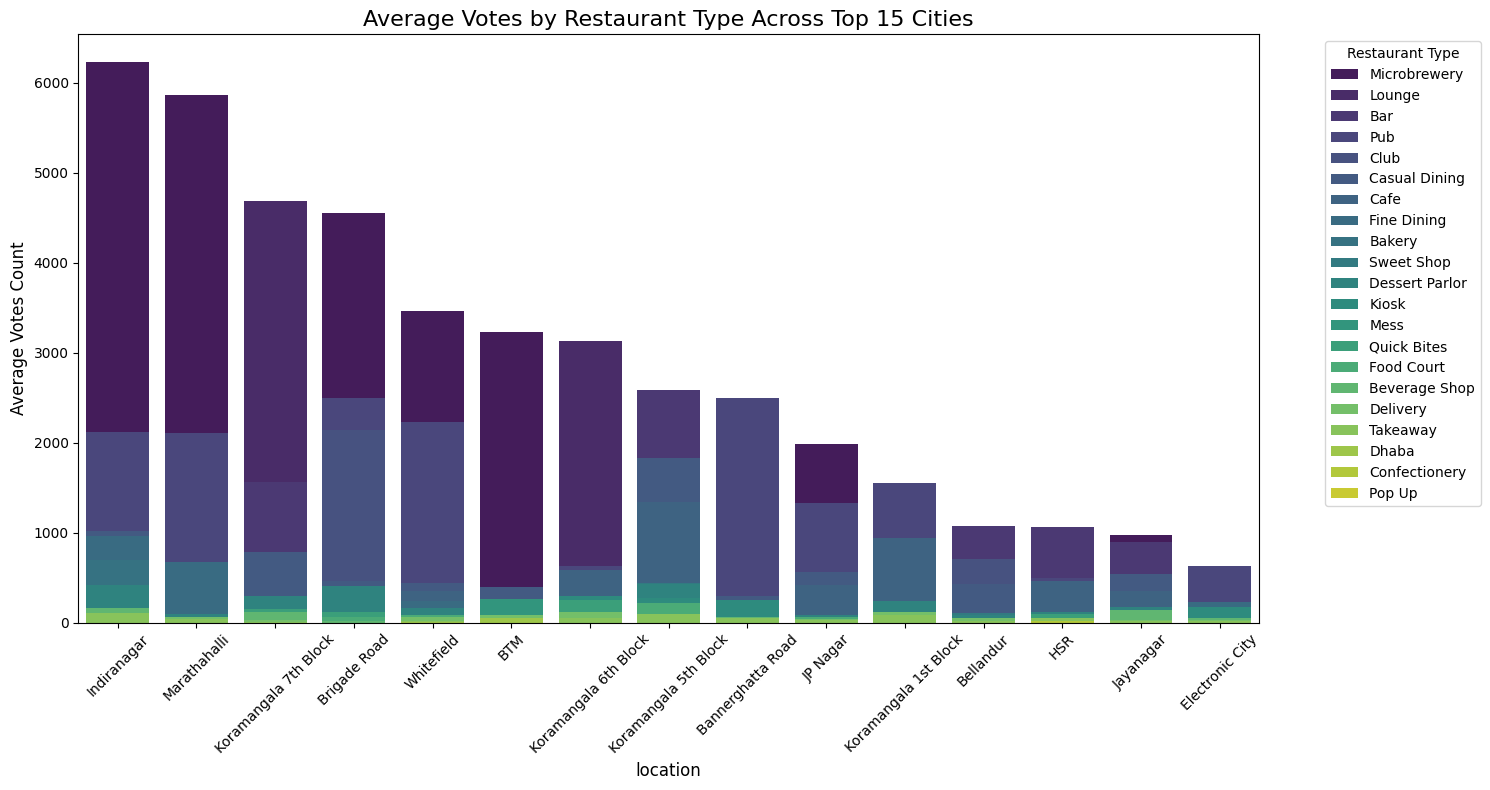

In [91]:
# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(
    data=sorted_data,
    x='restaurant_location',
    y='votes_count',
    hue='restaurant_type',
    order=sorted_data['restaurant_location'].unique(),  # Maintain sorted order for cities
    dodge=False,  # Combine bars for clarity
    palette="viridis"
)

# Customize the plot
plt.title('Average Votes by Restaurant Type Across Top 15 Cities', fontsize=16)
plt.xlabel('location', fontsize=12)
plt.ylabel('Average Votes Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()
# microbrewery, lounge and bar restaurant type has the most number of votes accros cities
# indiranagar and marathahali have the most votes.
# the website should focus on the lower vote cities to encourage customers to vote and rate the restaurants

### 6. Insights from Vizualisations
The insights were mentioned in a comment below each code.

### Conclusion of Zomato Dataset EDA

The exploratory data analysis (EDA) of the Zomato dataset aimed at providing a detailed understanding of the data through multiple steps, from data exploration to visualizations. Below is a summary of the approach followed and the overall conclusion:

#### 1. **Introduction of the Dataset and Aim of the EDA**  
   The dataset was introduced with the goal of understanding the structure and features, including restaurant details, ratings, reviews, and location-specific information. The aim of the EDA was to clean the data, handle missing values, and generate meaningful insights through visualizations.

#### 2. **Libraries Setup and Data Loading**  
   - The necessary libraries such as `pandas`, `numpy`, `seaborn`, and `plotly` were imported for data manipulation and visualization. These libraries provided an efficient setup for handling data and generating interactive visualizations, replacing tools like Tableau.
   
#### 3. **Data Overview and Review**  
   - The `info()` and `describe()` functions were used to get an overview of the dataset, including data types, non-null counts, and summary statistics.  
   - The `head()` and `tail()` functions helped to inspect the initial and final rows, allowing us to understand the structure and detect any obvious data issues.

#### 4. **Handling Missing Values and Data Structuring**  
   - Missing values were identified using `isnull().sum()`, and visualized using a heatmap for better clarity.  
   - Several data structuring steps were taken, including renaming columns for better readability, changing data types to appropriate formats, and handling missing values based on context (either filling or dropping values).
   - Outliers in numerical columns were detected using boxplots and were handled accordingly to ensure data consistency.

#### 5. **Data Analysis and Visualization**  
   - Seaborn, `matplotlib`, and `plotly` were leveraged to create clear and informative visualizations. These included distribution plots, bar plots, heatmaps, and interactive maps that provided a deeper understanding of the relationships and trends within the data.

#### 6. **Insights from Visualizations**  
   - Detailed insights were drawn from the visualizations. These included trends in restaurant ratings, popular cuisines, cost distributions, and restaurant types across different cities.  
   - Geospatial visualizations helped to represent location-based data, providing insights into the geographic distribution of restaurants and ratings.

### Final Notes  
The EDA process successfully transformed the raw dataset into a clean, structured format, making it ready for further analysis and predictive modeling. The handling of missing values, outliers, and data structuring steps ensured that the data was reliable and insightful. The visualizations not only helped in revealing key patterns but also paved the way for further analysis, such as geographic and trend-based evaluations, that could be used for operational decisions or restaurant recommendations. The thorough EDA process has laid a strong foundation for leveraging the dataset to uncover actionable insights.
